In [1]:
import tensorflow as tf
import os
import random
import numpy as np
import pandas as pd
from matplotlib.image import imread

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt

from tensorflow import keras
from keras import models
from tensorflow.keras.models import Model

import tensorflow 
print(tensorflow.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers,layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras.utils import plot_model


from tensorflow.keras.preprocessing.image import ImageDataGenerator

2.9.1


In [81]:
# Define our example directories and files
base_dir = 'fruits-360'
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Test')

def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=add_noise,)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=50,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [82]:
# cat1 = imread(train_dir+'/Avocado/0_100.jpg')
# # cat1.shape  #  shape  => les dimensions
# plt.imshow(cat1)

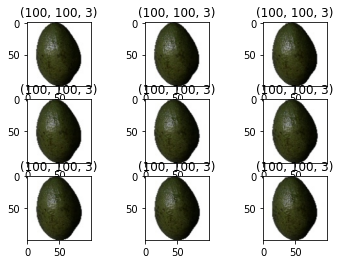

In [83]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    imageAvocado = imread(train_dir+'/Avocado/10'+str(i)+'_100.jpg')
    plt.imshow(imageAvocado)
    plt.title(imageAvocado.shape)

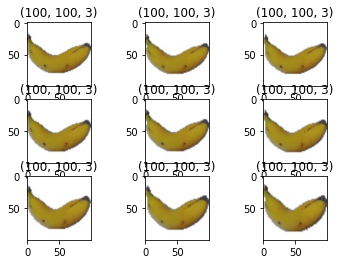

In [84]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    imageBanana = imread(train_dir+'/Banana/13'+str(i)+'_100.jpg')
    plt.imshow(imageBanana)
    plt.title(imageBanana.shape)

In [85]:
train_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_dir, target_size=(224,224), class_mode='categorical', batch_size=20)

Found 67692 images belonging to 131 classes.


In [86]:
# validator_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
#     .flow_from_directory(directory=test_dir, target_size=(150,150), class_mode='categorical', batch_size=20)

In [87]:
imgs, labels = next(train_batches)

In [88]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

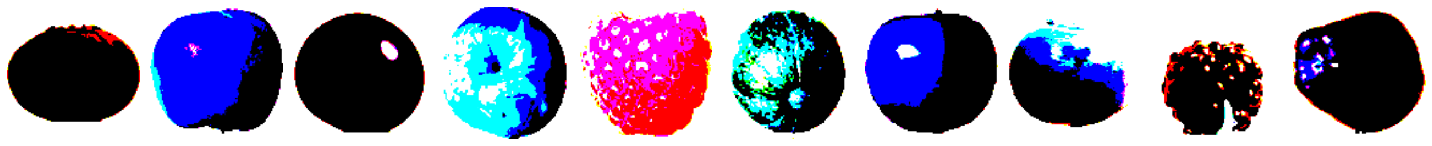

In [89]:
plotImages(imgs)

In [90]:
inputs = tf.keras.layers.Input(shape=(150, 150, 3))
x = tf.keras.layers.Dropout(0.2)(inputs)

x = tf.keras.layers.ZeroPadding2D(2)(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Conv2D(16, 3, activation='relu')(x)
# x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Dropout(0.4)(x)

x = tf.keras.layers.Conv2D(128, 3, activation='relu')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Dropout(0.4)(x)

x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Dropout(0.4)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(256, activation='relu')(x)
# x = tf.keras.layers.Dense(256, activation='relu')(x)

outputs = tf.keras.layers.Dense(131, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', metrics=['acc'], 
              optimizer='adam')
model.summary()

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 dropout_108 (Dropout)       (None, 150, 150, 3)       0         
                                                                 
 zero_padding2d_4 (ZeroPaddi  (None, 154, 154, 3)      0         
 ng2D)                                                           
                                                                 
 conv2d_93 (Conv2D)          (None, 152, 152, 64)      1792      
                                                                 
 dropout_109 (Dropout)       (None, 152, 152, 64)      0         
                                                                 
 conv2d_94 (Conv2D)          (None, 150, 150, 128)     73856     
                                                          

In [91]:
history = model.fit(train_generator, epochs=15, steps_per_epoch=50, 
                   validation_data=validation_generator, validation_steps=100)

Epoch 1/15
50/50 [==============================] - 242s 5s/step - loss: 5.7190 - acc: 0.0116 - val_loss: 4.8740 - val_acc: 0.0110
Epoch 2/15
50/50 [==============================] - 248s 5s/step - loss: 4.9067 - acc: 0.0140 - val_loss: 4.8614 - val_acc: 0.0145
Epoch 3/15
50/50 [==============================] - 249s 5s/step - loss: 4.7239 - acc: 0.0188 - val_loss: 4.6317 - val_acc: 0.0400
Epoch 4/15
50/50 [==============================] - 245s 5s/step - loss: 4.5130 - acc: 0.0312 - val_loss: 4.3039 - val_acc: 0.0715
Epoch 5/15
50/50 [==============================] - 247s 5s/step - loss: 4.0260 - acc: 0.0744 - val_loss: 4.1385 - val_acc: 0.0515
Epoch 6/15
50/50 [==============================] - 245s 5s/step - loss: 3.6096 - acc: 0.1048 - val_loss: 3.6919 - val_acc: 0.1150
Epoch 7/15
50/50 [==============================] - 246s 5s/step - loss: 3.2471 - acc: 0.1464 - val_loss: 3.2271 - val_acc: 0.2100
Epoch 8/15
50/50 [==============================] - 249s 5s/step - loss: 2.8746 - a

In [75]:
# history = model.fit(train_generator, epochs=10, steps_per_epoch=50, 
#                    validation_data=validation_generator, validation_steps=100)

Epoch 1/10
50/50 [==============================] - 75s 1s/step - loss: 5.0622 - acc: 0.0092 - val_loss: 4.8592 - val_acc: 0.0115
Epoch 2/10
50/50 [==============================] - 76s 2s/step - loss: 4.7502 - acc: 0.0216 - val_loss: 4.7464 - val_acc: 0.0425
Epoch 3/10
50/50 [==============================] - 72s 1s/step - loss: 4.2694 - acc: 0.0404 - val_loss: 4.2134 - val_acc: 0.0690
Epoch 4/10
50/50 [==============================] - 73s 1s/step - loss: 3.6287 - acc: 0.0948 - val_loss: 3.7639 - val_acc: 0.1210
Epoch 5/10
50/50 [==============================] - 73s 1s/step - loss: 3.1735 - acc: 0.1564 - val_loss: 3.6063 - val_acc: 0.0945
Epoch 6/10
50/50 [==============================] - 73s 1s/step - loss: 2.8229 - acc: 0.2112 - val_loss: 3.4339 - val_acc: 0.1355
Epoch 7/10
50/50 [==============================] - 74s 1s/step - loss: 2.4331 - acc: 0.2988 - val_loss: 3.7282 - val_acc: 0.0820
Epoch 8/10
50/50 [==============================] - 78s 2s/step - loss: 2.1490 - acc: 0.36

In [92]:
historybis = model.fit(train_generator, epochs=15, steps_per_epoch=50, 
                   validation_data=validation_generator, validation_steps=100)

Epoch 1/15
50/50 [==============================] - 238s 5s/step - loss: 1.3518 - acc: 0.5784 - val_loss: 1.6839 - val_acc: 0.5055
Epoch 2/15
50/50 [==============================] - 244s 5s/step - loss: 1.2400 - acc: 0.6084 - val_loss: 2.0738 - val_acc: 0.4025
Epoch 3/15
50/50 [==============================] - 237s 5s/step - loss: 1.1583 - acc: 0.6344 - val_loss: 1.4820 - val_acc: 0.5505
Epoch 4/15
50/50 [==============================] - 241s 5s/step - loss: 1.0174 - acc: 0.6802 - val_loss: 1.9830 - val_acc: 0.4300
Epoch 5/15
50/50 [==============================] - 236s 5s/step - loss: 1.0445 - acc: 0.6572 - val_loss: 1.1934 - val_acc: 0.6500
Epoch 6/15
50/50 [==============================] - 236s 5s/step - loss: 0.9561 - acc: 0.7028 - val_loss: 2.5510 - val_acc: 0.4580
Epoch 7/15
50/50 [==============================] - 238s 5s/step - loss: 0.8964 - acc: 0.7152 - val_loss: 1.4349 - val_acc: 0.5875
Epoch 8/15
50/50 [==============================] - 267s 5s/step - loss: 0.8754 - a

KeyboardInterrupt: 